In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('gas0.csv', index_col=0)
df

,gas_pumped,vehicle_tons
0,4.863340,0.876393
1,5.221294,0.289274
2,5.753711,0.551745
5,7.491693,1.746046
6,8.953863,3.436751
...,...,...
209,8.276677,1.267911
210,11.561033,3.320541
211,6.285658,1.174349
214,3.344203,0.129916


In [4]:
#df['vehicle_tons'] = np.linspace(start=0.1, stop=5.5, num=df.shape[0])
X = df[['vehicle_tons']]
X

,vehicle_tons
0,0.876393
1,0.289274
2,0.551745
5,1.746046
6,3.436751
...,...
209,1.267911
210,3.320541
211,1.174349
214,0.129916


In [5]:
df['gas_pumped']=4.388278108944324+1.40417174*X+2.3*X**2-0.7*X**3+1.23*X**4+np.random.randn(X.shape[0]).reshape(-1,1)*10
y = df['gas_pumped']

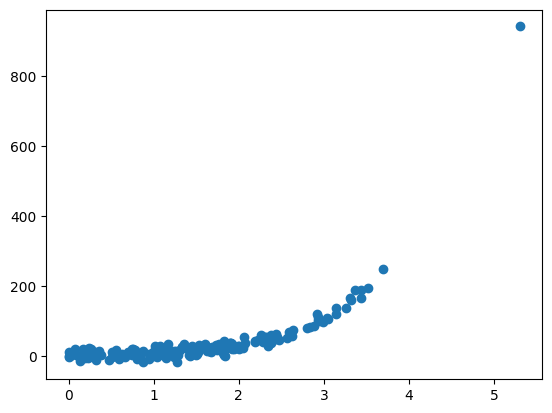

In [6]:
plt.scatter(df['vehicle_tons'], df['gas_pumped'])
plt.show()

In [7]:
# Group the data into 20 groups randomly
np.random.seed(42)
groups = 20
# This will return a list of numbers from 0-19 repeating matching the length of the number of rows of
# our data set
df_indices_mod_10 = np.arange(df.shape[0]) % groups
# Shuffle the groups and assign the the rows
np.random.shuffle(df_indices_mod_10)
df['group'] = df_indices_mod_10
df

,gas_pumped,vehicle_tons,group
0,-15.777983,0.876393,16
1,11.087469,0.289274,5
2,17.706508,0.551745,1
5,18.383254,1.746046,7
6,188.642735,3.436751,1
...,...,...,...
209,14.933146,1.267911,11
210,161.021597,3.320541,6
211,36.614511,1.174349,14
214,-12.577017,0.129916,12


In [8]:
df.groupby(['group'], as_index=False).count()

,group,gas_pumped,vehicle_tons
0,0,9,9
1,1,9,9
2,2,9,9
3,3,9,9
4,4,9,9
5,5,9,9
6,6,9,9
7,7,9,9
8,8,9,9
9,9,9,9


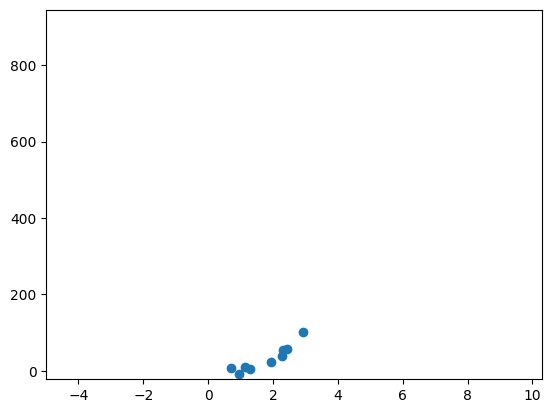

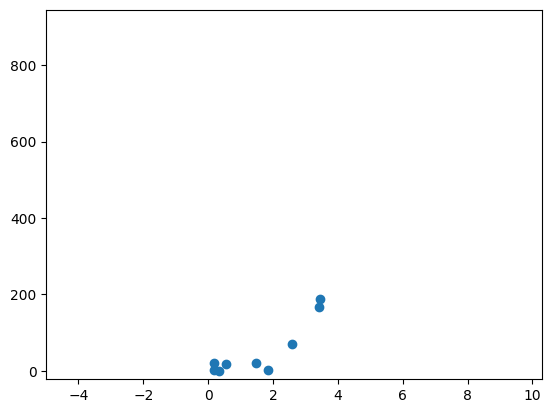

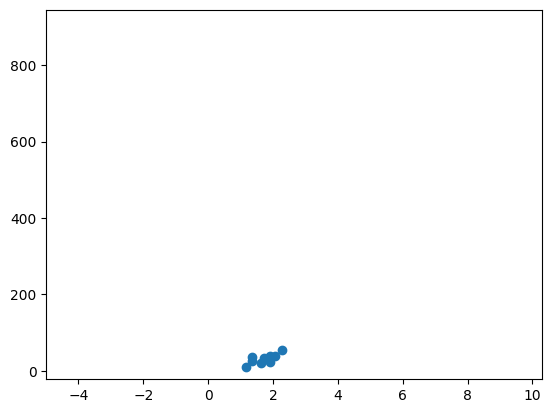

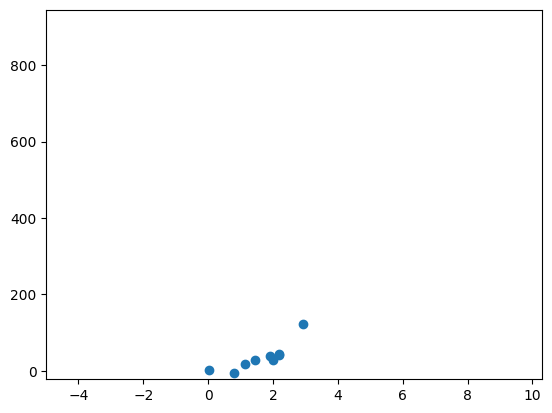

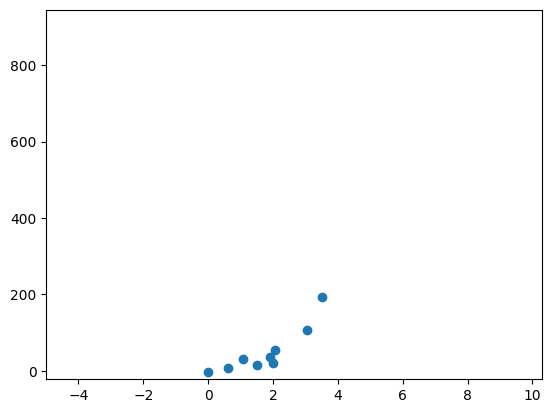

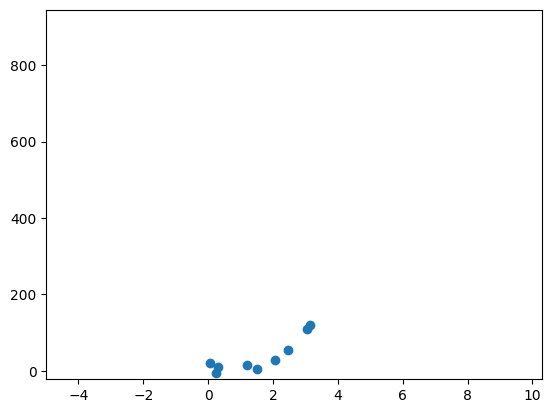

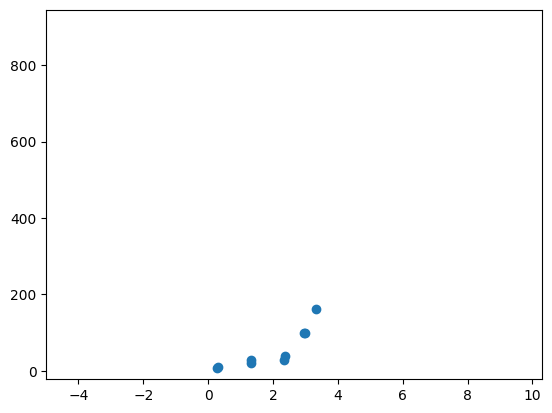

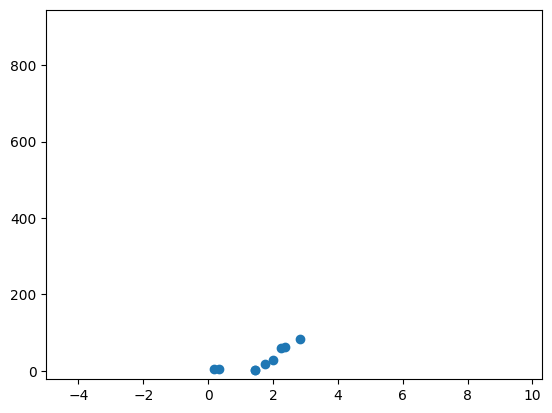

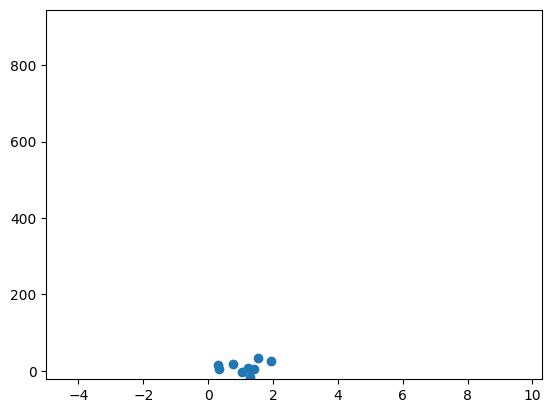

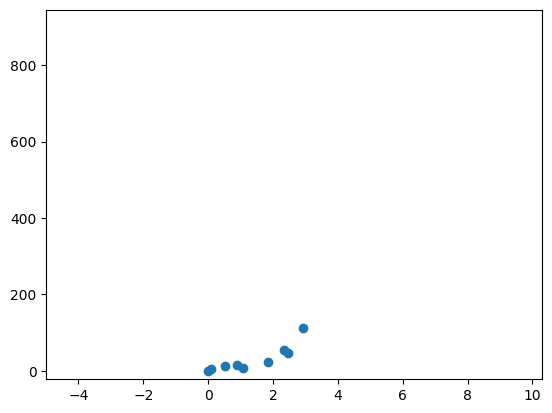

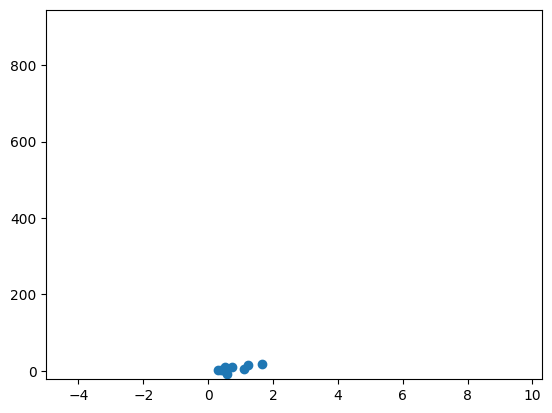

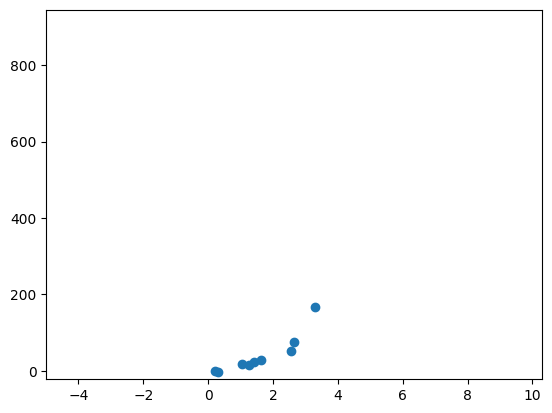

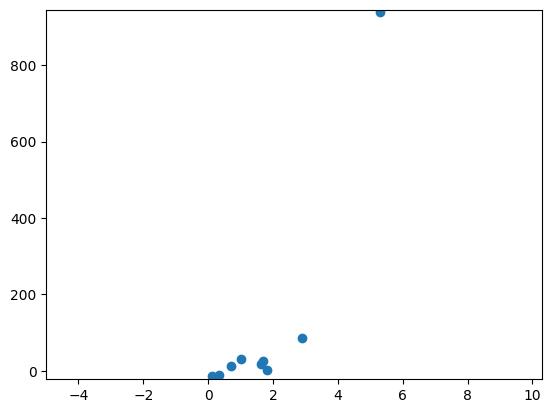

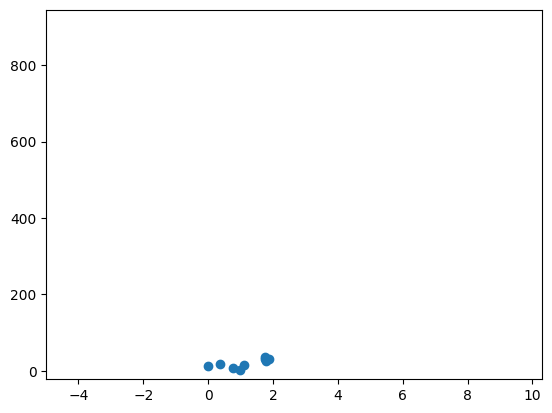

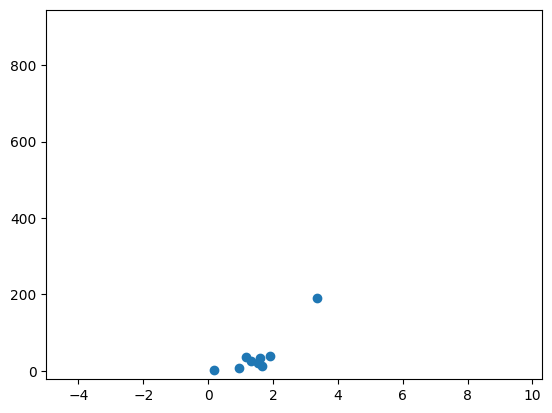

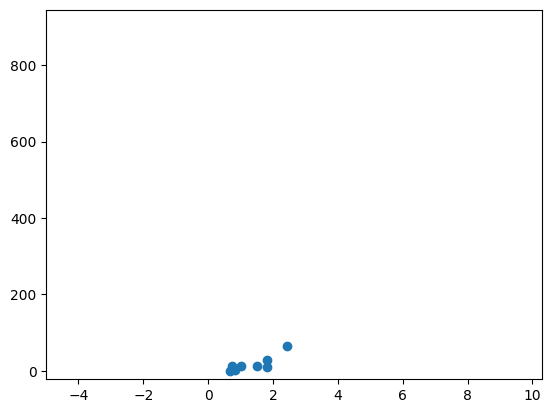

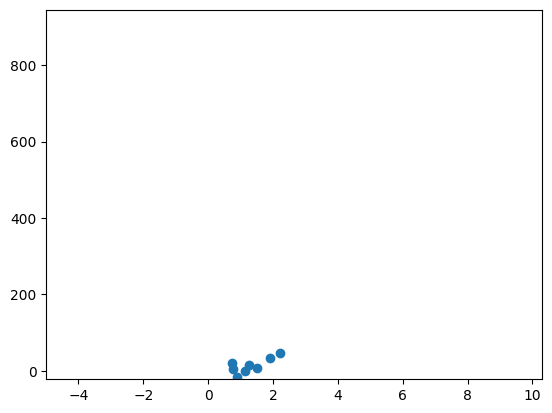

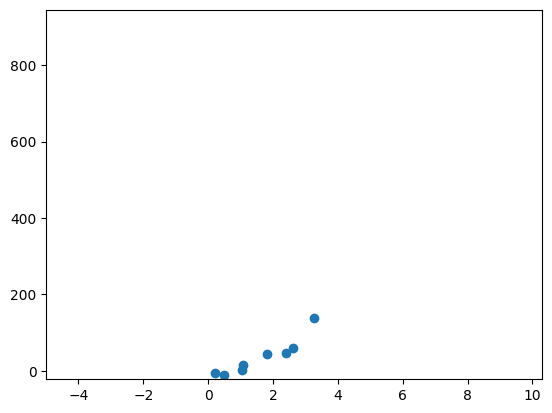

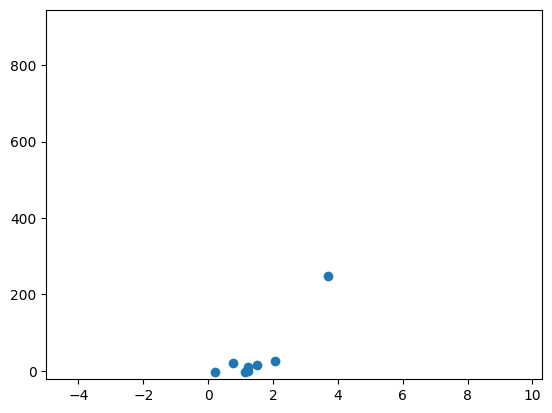

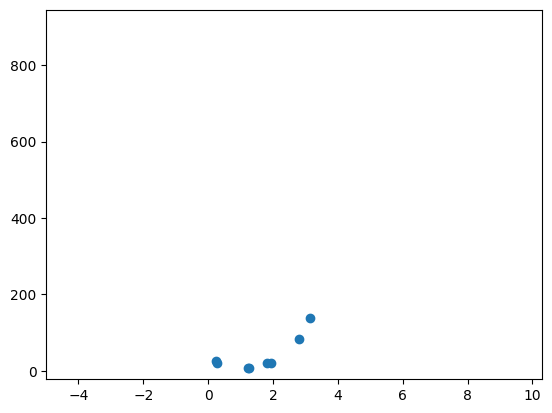

In [9]:
# Plot the data for each group
for g in np.arange(groups):
    temp_df = df[df['group']==g]
    plt.scatter(temp_df['vehicle_tons'], temp_df['gas_pumped'])
    plt.xlim(min(df['vehicle_tons'])-5,max(df['vehicle_tons'])+5)
    plt.ylim(min(df['gas_pumped'])-5,max(df['gas_pumped'])+5)
    plt.show()

In [10]:
data = []
degrees = 10
# Create polynomial feature matrices from degree 1 to degree equal to the number of degrees
for degree in np.arange(start=1, stop=degrees+1):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(), index=df.index)
    # Fit a regression for this degree of polynomial for all values in each group and every group
    # numbered below that group
    for g in np.arange(start=1, stop=groups):
        X_train = poly_df[df['group']<g]
        X_test = poly_df[df['group']>=g]
        y_train = y[df['group']<g]
        y_test = y[df['group']>=g]
        reg = LinearRegression().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        data.append({'group':g,
                     'group_size':X_train.shape[0]/poly_df.shape[0],
                     'degree':degree,
                     'test_rse':np.sqrt(mean_squared_error(y_test, y_pred)),
                     'train_rse':np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))})

results = pd.DataFrame(data)
results

,group,group_size,degree,test_rse,train_rse
0,1,0.051429,1,65.577406,12.305526
1,2,0.102857,1,63.830699,30.139507
2,3,0.154286,1,66.195500,26.188177
3,4,0.205714,1,68.583883,24.647038
4,5,0.257143,1,69.699019,26.056810
...,...,...,...,...,...
185,15,0.771429,10,14.953824,10.065809
186,16,0.817143,10,16.992826,9.965837
187,17,0.862857,10,18.502799,10.060138
188,18,0.908571,10,16.118556,10.135003


In [11]:
poly_df

,vehicle_tons,vehicle_tons^2,vehicle_tons^3,vehicle_tons^4,vehicle_tons^5,vehicle_tons^6,vehicle_tons^7,vehicle_tons^8,vehicle_tons^9,vehicle_tons^10
0,0.876393,0.768064,0.673126,0.589923,0.517004,0.453099,3.970923e-01,3.480088e-01,3.049924e-01,2.672931e-01
1,0.289274,0.083680,0.024206,0.007002,0.002026,0.000586,1.694997e-04,4.903189e-05,1.418367e-05,4.102970e-06
2,0.551745,0.304423,0.167964,0.092673,0.051132,0.028212,1.556572e-02,8.588306e-03,4.738556e-03,2.614475e-03
5,1.746046,3.048676,5.323127,9.294424,16.228489,28.335683,4.947540e+01,8.638631e+01,1.508344e+02,2.633638e+02
6,3.436751,11.811255,40.592338,139.505744,479.446455,1647.737912,5.662864e+03,1.946185e+04,6.688553e+04,2.298689e+05
...,...,...,...,...,...,...,...,...,...,...
209,1.267911,1.607599,2.038293,2.584375,3.276758,4.154639,5.267714e+00,6.678994e+00,8.468373e+00,1.073715e+01
210,3.320541,11.025993,36.612263,121.572524,403.686561,1340.457811,4.451045e+03,1.477988e+04,4.907719e+04,1.629628e+05
211,1.174349,1.379095,1.619539,1.901904,2.233499,2.622908,3.080209e+00,3.617240e+00,4.247902e+00,4.988520e+00
214,0.129916,0.016878,0.002193,0.000285,0.000037,0.000005,6.246665e-07,8.115444e-08,1.054329e-08,1.369747e-09


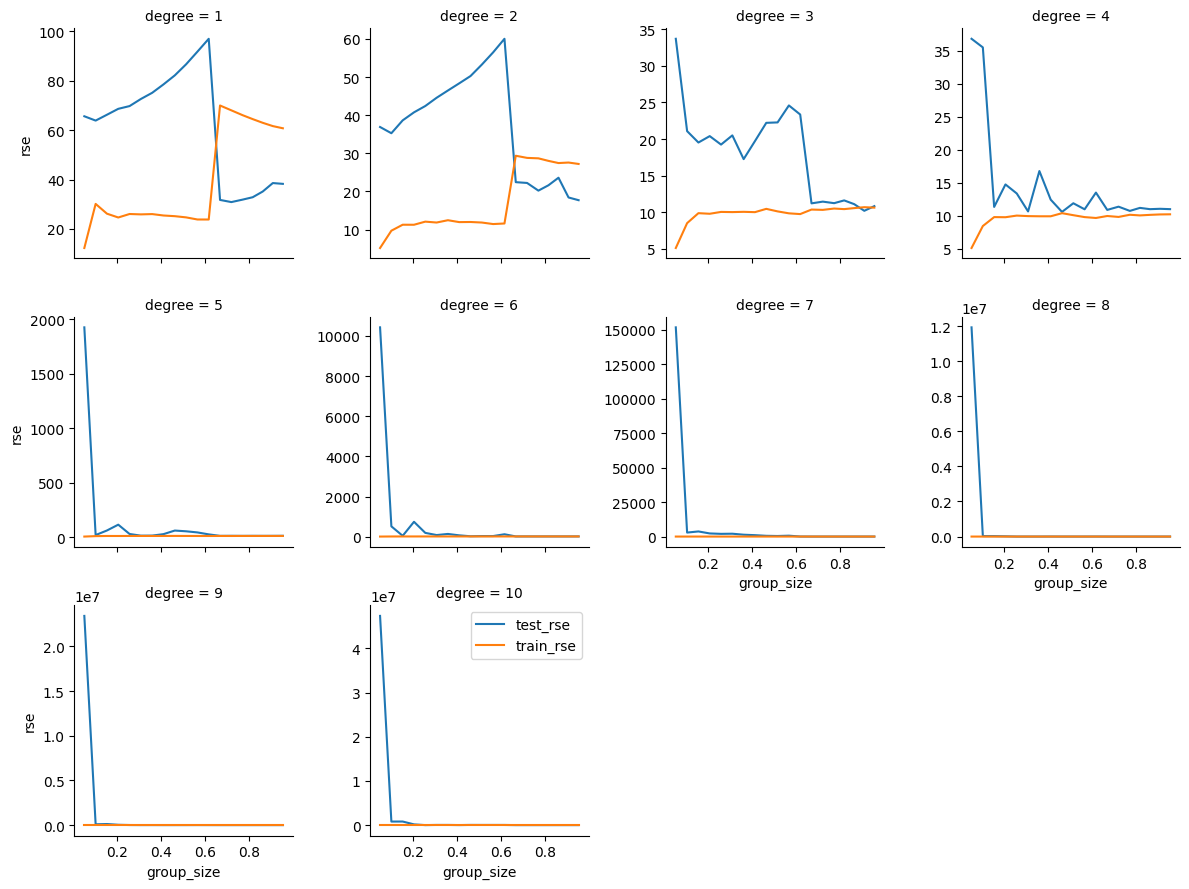

In [12]:
# Graph the training and testing rse (root mean squared errors)
melted = results.melt(id_vars=['group', 'group_size', 'degree'], value_name='rse')

g = sns.FacetGrid(melted, col="degree", col_wrap=4, sharey=False, hue='variable')
g.map(sns.lineplot, 'group_size', 'rse')
plt.legend()
plt.show()

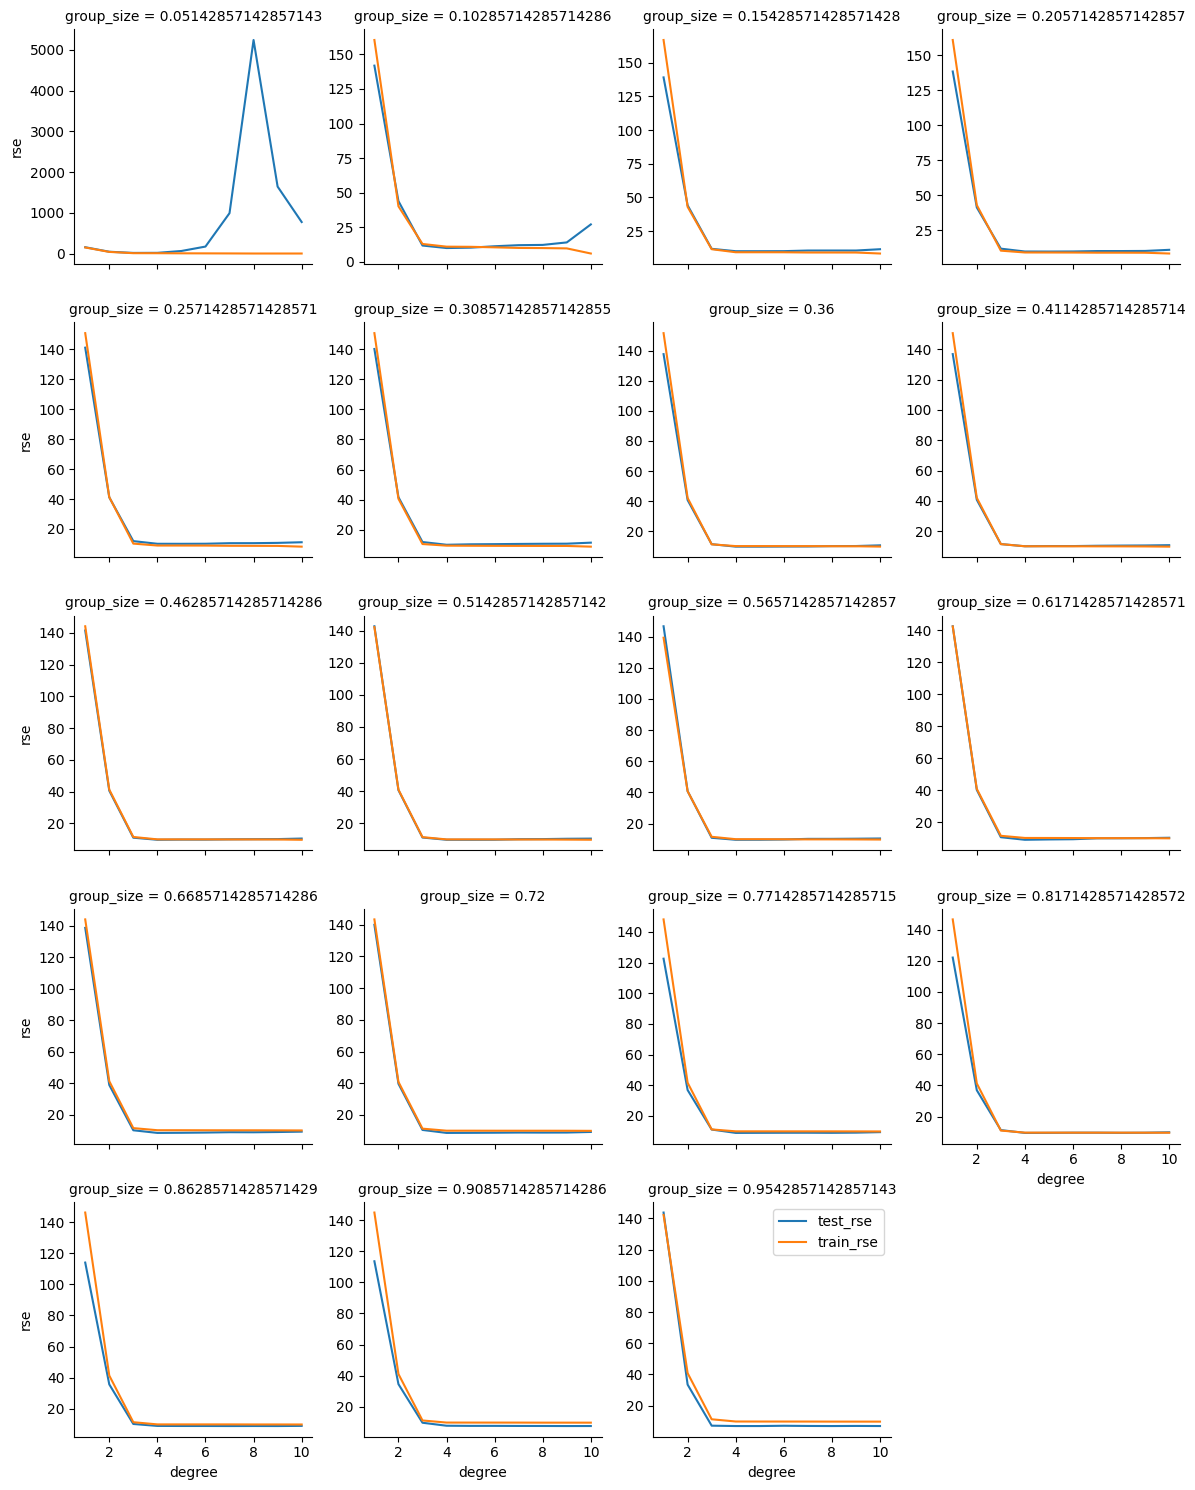

In [ ]:
g = sns.FacetGrid(melted, col="group_size", col_wrap=4, sharey=False, hue='variable')
g.map(sns.lineplot, 'degree', 'rse')
plt.legend()
plt.show()

In [ ]:
best_test = results.sort_values(['group', 'test_rse']).drop_duplicates(subset=['group']).set_index('group')
best_test 

,group_size,degree,test_rse,train_rse
group,,,,
1,0.051429,3,14.882994,8.211233
2,0.102857,4,9.849343,10.850082
3,0.154286,4,10.102880,9.336853
4,0.205714,5,9.957415,9.278645
5,0.257143,5,10.097296,8.942652
6,0.308571,4,10.023199,9.437900
7,0.360000,5,9.757726,10.125327
8,0.411429,4,9.930090,9.921003
9,0.462857,4,9.744990,10.005872


In [ ]:
best_train = results.sort_values(['group', 'train_rse']).drop_duplicates(subset=['group']).set_index('group')
best_train

,group_size,degree,test_rse,train_rse
group,,,,
1,0.051429,10,773.460144,0.000005
2,0.102857,10,26.962534,5.889636
3,0.154286,10,11.584459,8.396474
4,0.205714,10,11.187816,8.559272
5,0.257143,10,11.138629,8.203157
6,0.308571,10,11.419442,8.769960
7,0.360000,10,10.625531,9.797238
8,0.411429,10,10.643852,9.670634
9,0.462857,10,10.518719,9.742955


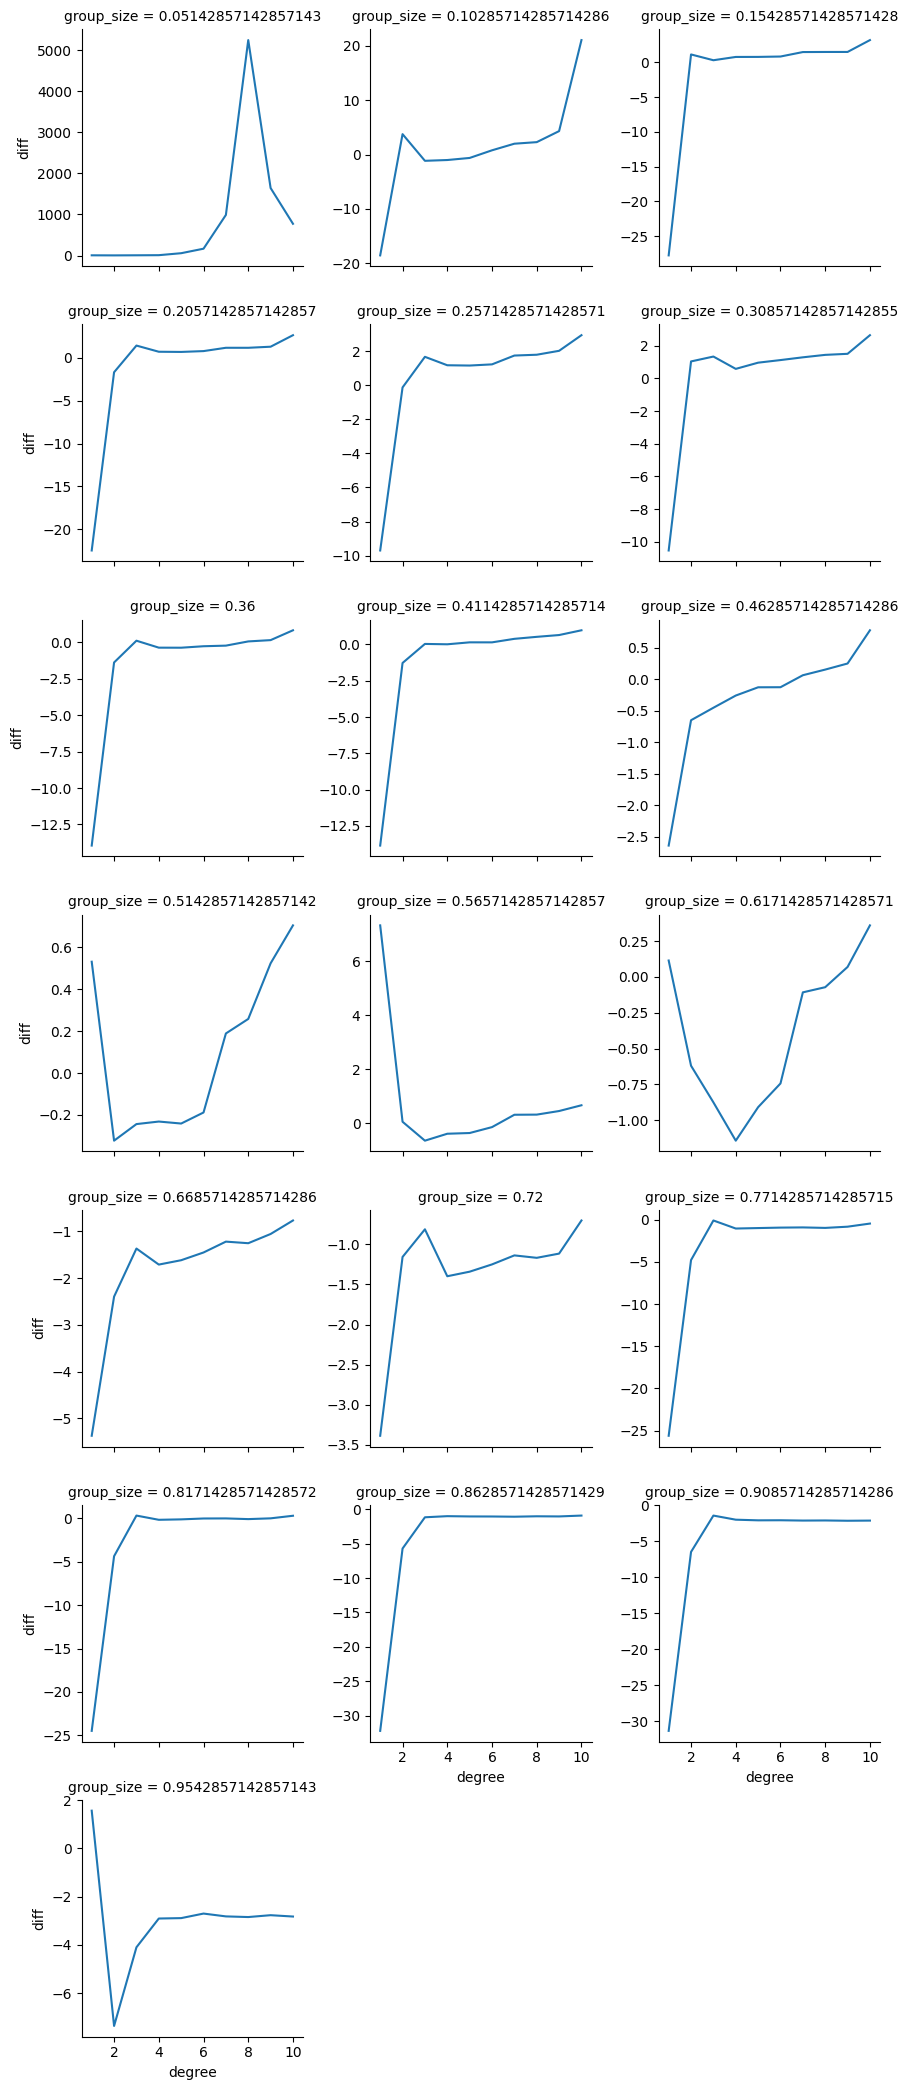

In [ ]:
results_copy = results.copy()
# Let's take the difference between the 
results_copy['diff'] = results_copy['test_rse'] - results_copy['train_rse']
g = sns.FacetGrid(results_copy, col="group_size", col_wrap=3, sharey=False)
g.map(sns.lineplot, 'degree', 'diff')
plt.show()

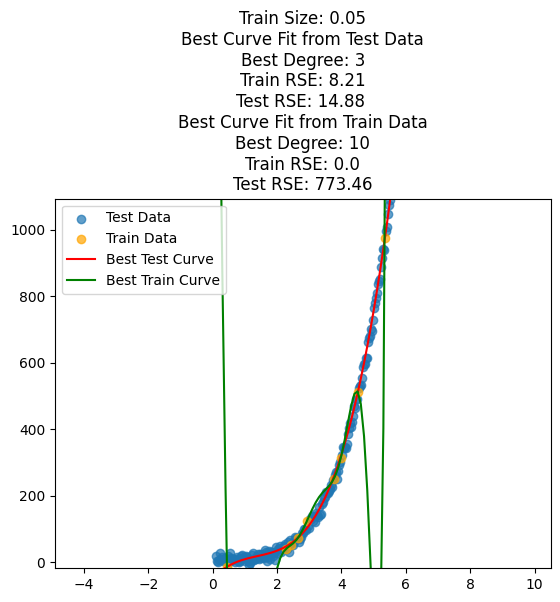

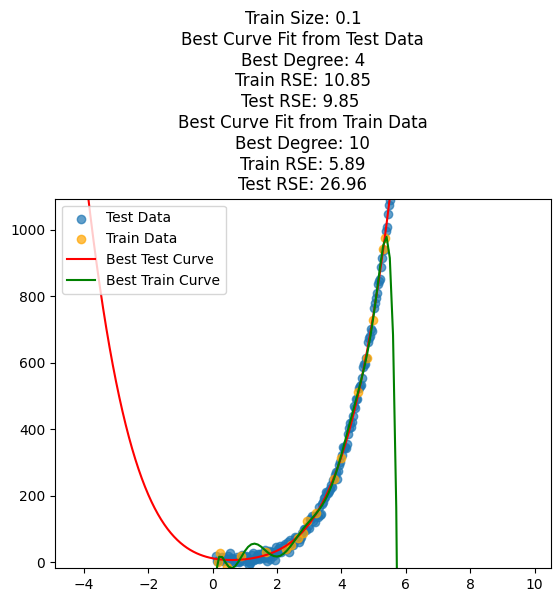

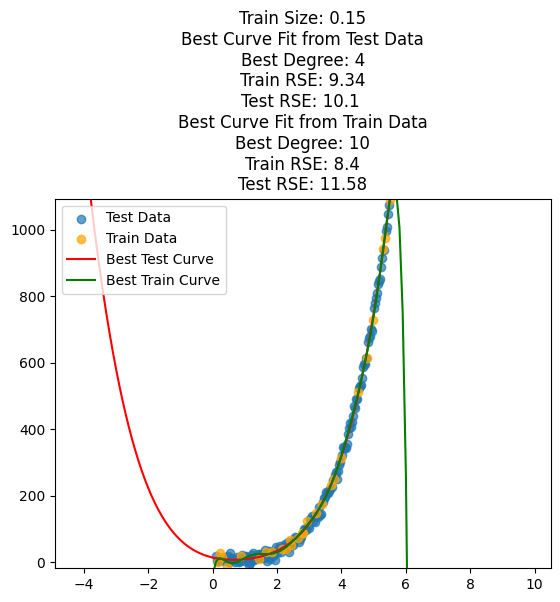

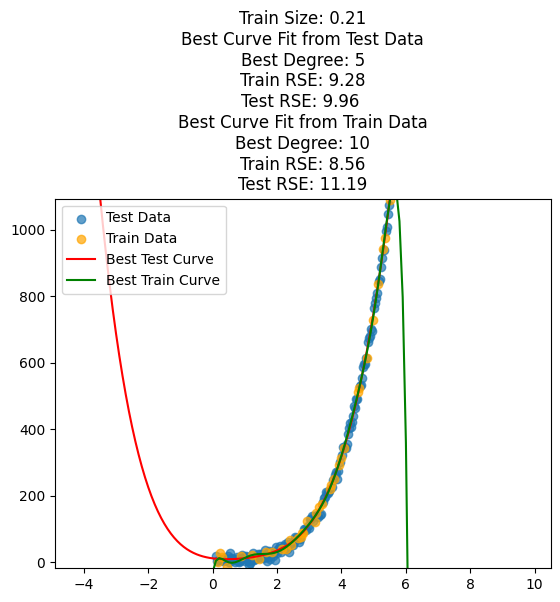

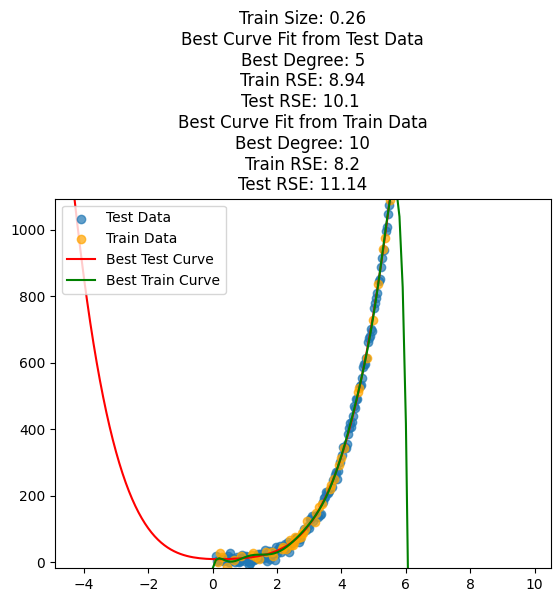

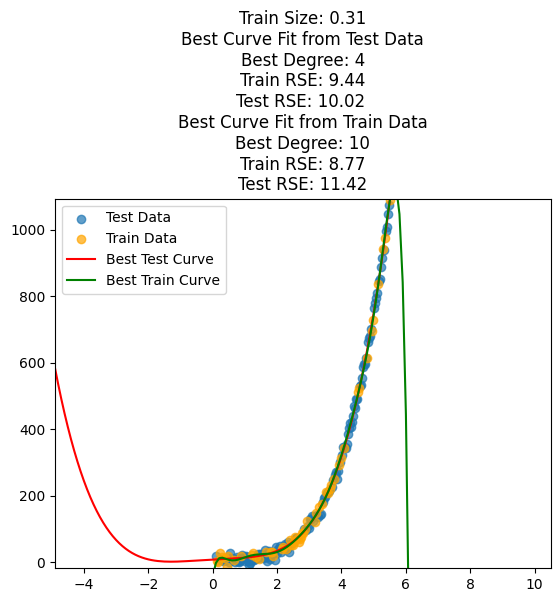

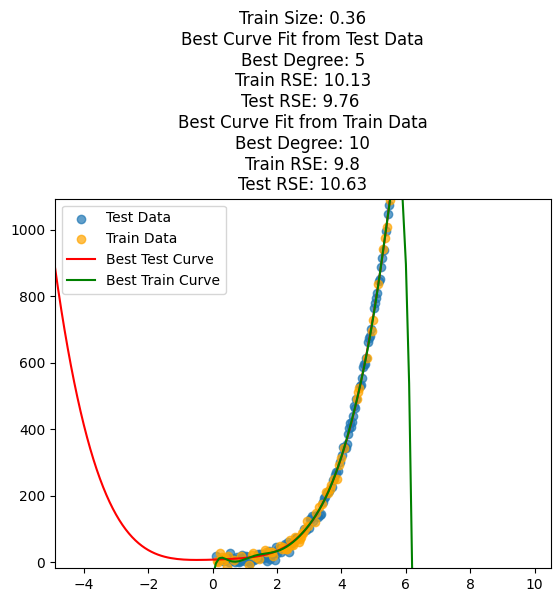

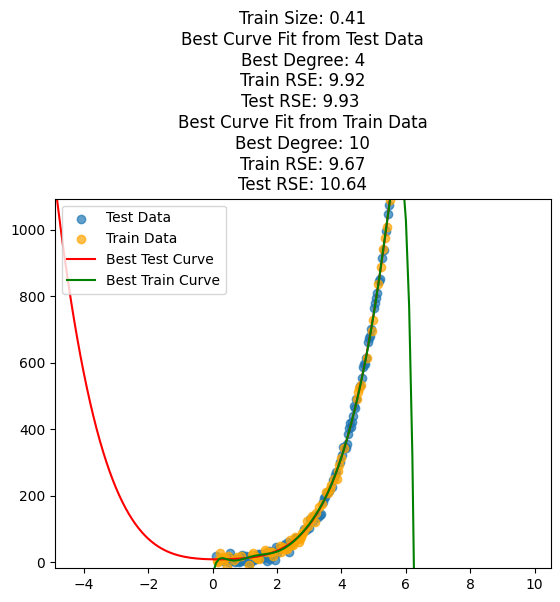

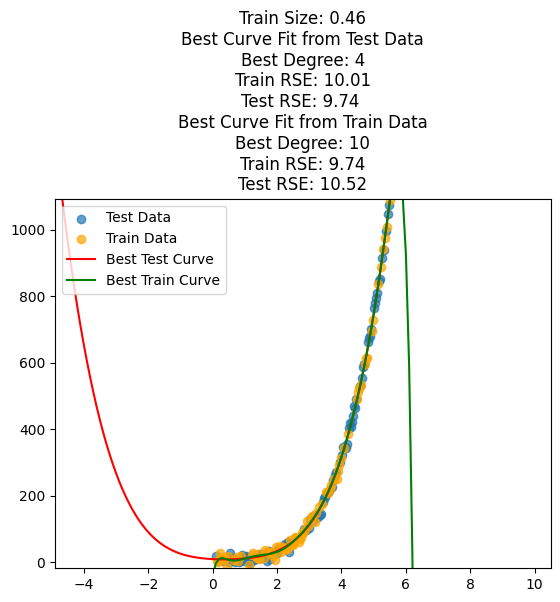

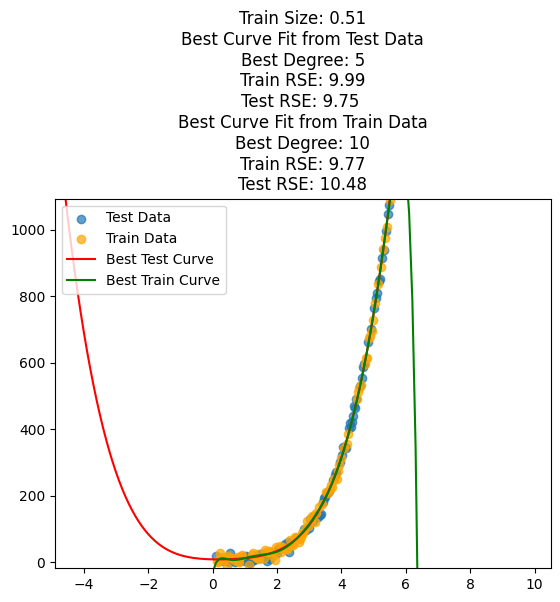

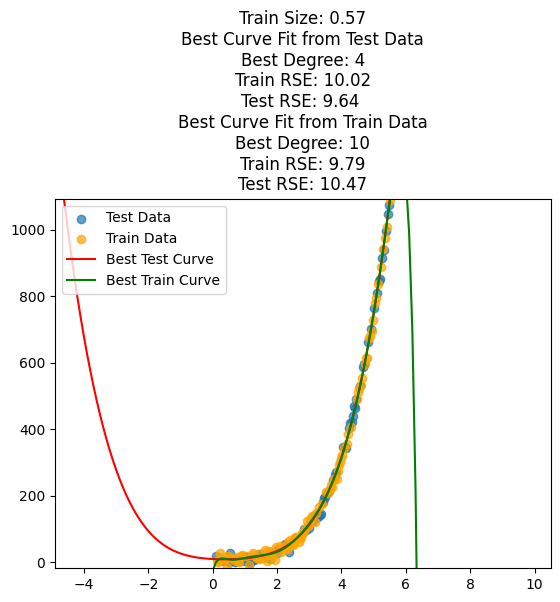

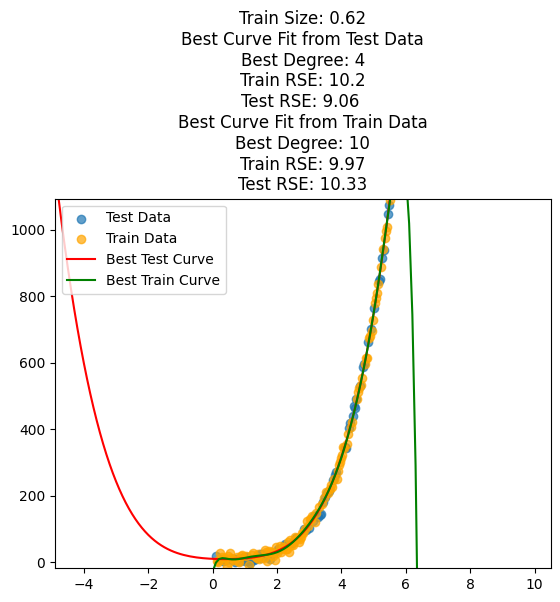

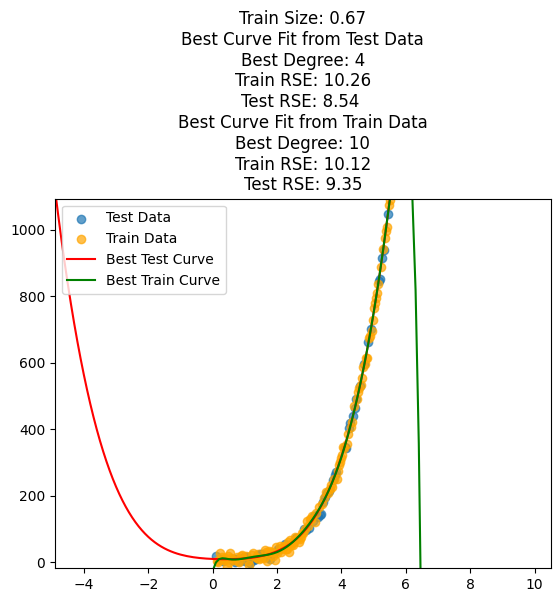

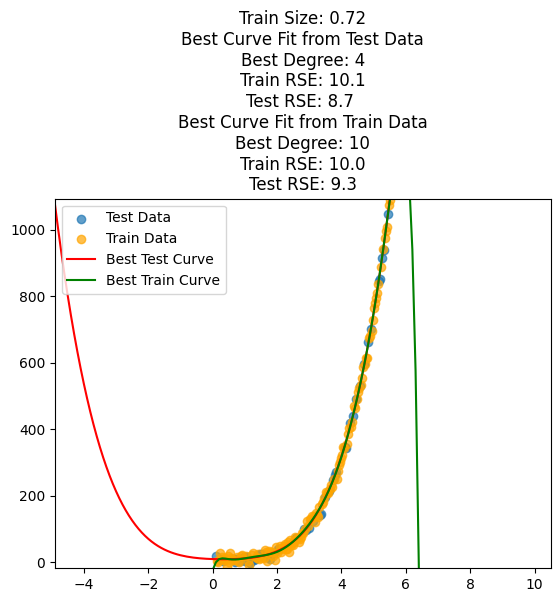

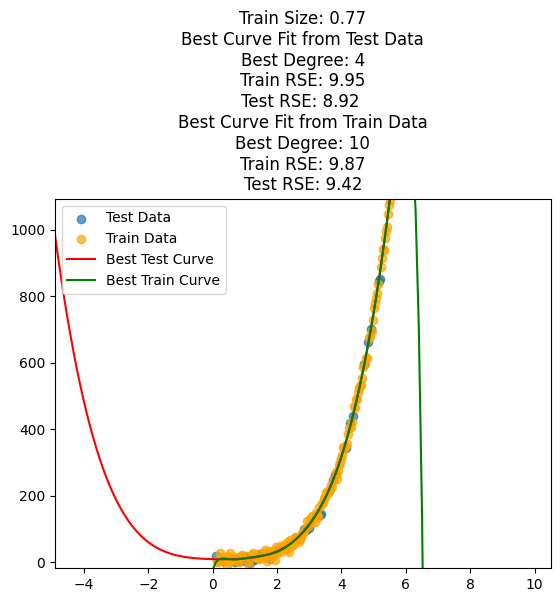

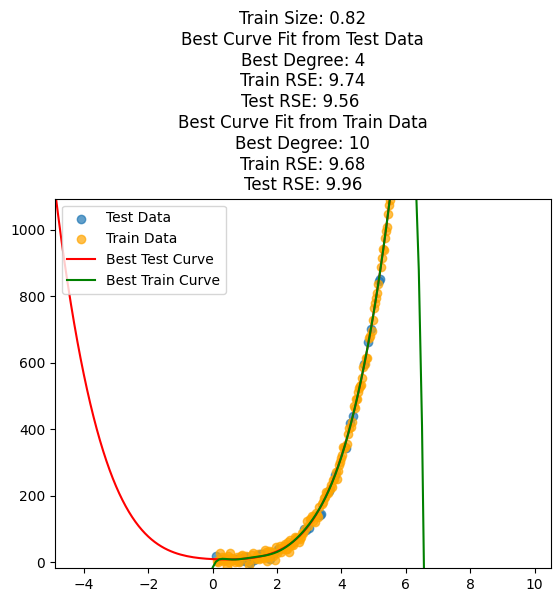

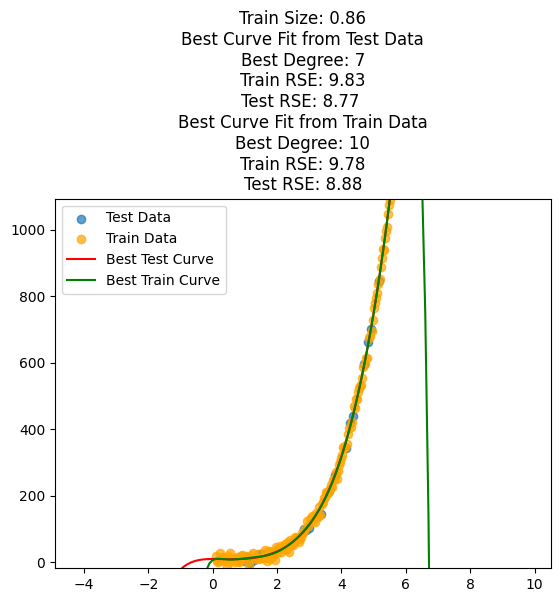

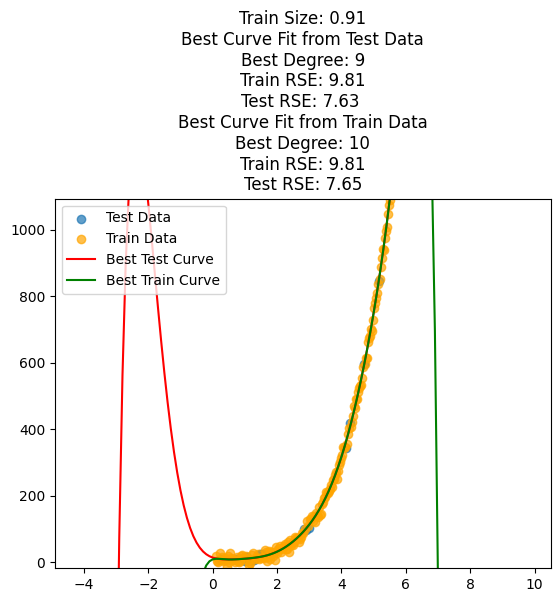

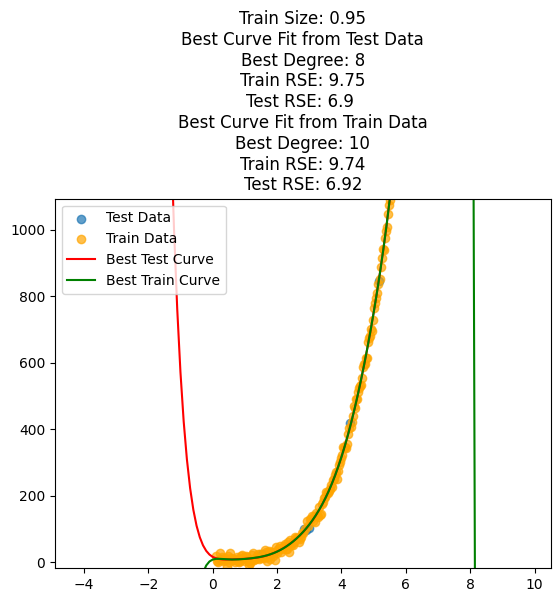

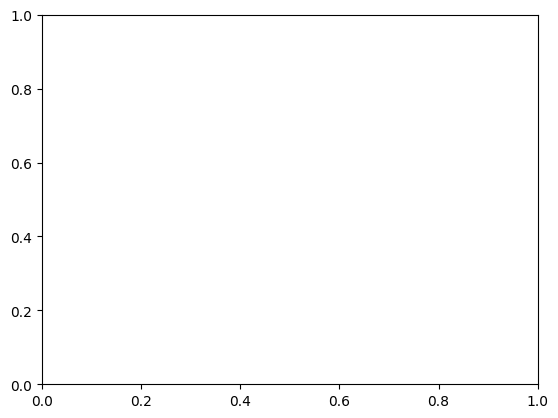

In [ ]:
filenames = []
alpha = 0.7

for g in np.arange(start=1, stop=groups):
    # Get the best polynomial degree for this group and fit feature with that degree of polynomial
    best_test_degree = best_test.loc[g,'degree']
    best_train_degree = best_train.loc[g,'degree']

    # Create range of x values and use the fitted regression to fit the y values
    # For our polynomial regression
    x_values = pd.DataFrame(np.arange(min(df['vehicle_tons'])-5,max(df['vehicle_tons'])+6, step=0.1), columns=['vehicle_tons'])
    #Fit best test
    poly = PolynomialFeatures(best_test_degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(), index=df.index)
    # Grab test and train and fit best regression
    X_train = poly_df[df['group']<g]
    X_test = poly_df[df['group']>=g]
    y_train = y[df['group']<g]
    y_test = y[df['group']>=g]
    reg_test = LinearRegression().fit(X_train, y_train)
    y_values_test = reg_test.predict(pd.DataFrame(poly.transform(x_values), columns=poly.get_feature_names_out()))

    #Fit best train
    poly = PolynomialFeatures(best_train_degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(), index=df.index)
    # Grab test and train and fit best regression
    X_train = poly_df[df['group']<g]
    X_test = poly_df[df['group']>=g]
    y_train = y[df['group']<g]
    y_test = y[df['group']>=g]
    reg_train = LinearRegression().fit(X_train, y_train)
    y_values_train = reg_train.predict(pd.DataFrame(poly.transform(x_values), columns=poly.get_feature_names_out()))
    # Plot the train and test data
    plt.scatter(X_test['vehicle_tons'], y_test, alpha=alpha, label='Test Data')
    plt.scatter(X_train['vehicle_tons'], y_train, color='orange', alpha=alpha, label='Train Data')
    # Plot the fitted polynomial curve
    plt.plot(x_values, y_values_test, c='red', label='Best Test Curve')
    plt.plot(x_values, y_values_train, c='green', label='Best Train Curve')
    plt.title(f'Train Size: {np.round(X_train.shape[0]/df.shape[0],2)}\nBest Curve Fit from Test Data\nBest Degree: {best_test_degree}\nTrain RSE: {np.round(best_test.loc[g,'train_rse'],2):,}\nTest RSE: {np.round(best_test.loc[g,'test_rse'],2):,} \nBest Curve Fit from Train Data\nBest Degree: {best_train_degree}\nTrain RSE: {np.round(best_train.loc[g,'train_rse'],2):,}\nTest RSE: {np.round(best_train.loc[g,'test_rse'],2):,}')
    plt.legend(loc="upper left")
    plt.xlim(min(df['vehicle_tons'])-5,max(df['vehicle_tons'])+5)
    plt.ylim(min(df['gas_pumped'])-5,max(df['gas_pumped'])+5)
    fn = f'tmp/both_poly_{str(g).zfill(2)}.png'
    plt.savefig(fn, bbox_inches='tight')
    filenames.append(fn)
    plt.show()
    plt.cla()

# Create GIF
import imageio
images = []

for filename in filenames:
    for i in np.arange(10):
        images.append(imageio.v2.imread(filename))


imageio.mimsave('animation_both.gif', images,loop=10, duration=0.2)